In [16]:
# import basic libraries for first step data cleansing and exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
titanic_data=pd.read_csv("../data/train.csv")

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


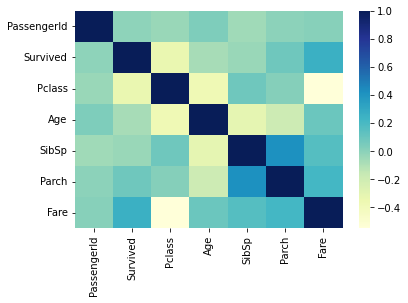

In [20]:
# titanic_data.corr() 
# the following heatmap shows the correlation between each columns blue +ve corr and yellow -ve corr

sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

# sex isn't correlated here because it is not numeric so we have to make it numeric

In [21]:
# shuffle and take 80/20 train to test data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indicies, test_indicies in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indicies]
    strat_test_set = titanic_data.loc[test_indicies]


In [22]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S


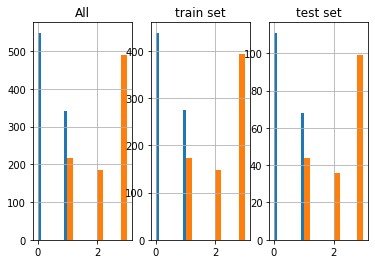

In [23]:
plt.subplot(1,3,1,title="All")
titanic_data["Survived"].hist()
titanic_data["Pclass"].hist()
# titanic_data["Sex"].hist()

plt.subplot(1,3,2,title="train set")
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
# strat_train_set["Sex"].hist()

plt.subplot(1,3,3,title="test set")
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
# strat_test_set["Sex"].hist()

plt.show()

In [24]:
# view and handle any missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# we have 177 age records null, it is not reasonable to drop all these rows; instead we will assign them a mean age

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

# impute missing age values to the mean value

class Age_Imputer(BaseEstimator,TransformerMixin):
    def fit(self,df,y=None):
        return self
    def transform(self,df:pd.DataFrame):
        imputer=SimpleImputer(strategy="mean") # the default strategy is mean
        df[["Age"]] = imputer.fit_transform(df[["Age"]])
        return df


In [27]:
from sklearn.preprocessing import OneHotEncoder

class Feature_Encodder():
    def fit(self,df:pd.DataFrame,y=None):
        return self
    def transform(self,df:pd.DataFrame):
        encoder = OneHotEncoder()
        ary=encoder.fit_transform(df[["Embarked"]]).toarray()
    
        if ary.shape[1] ==3:
            new_column_names=sorted(["C","S","Q"])
        else:
            new_column_names=sorted(["C","S","Q","n"])


        for i in range(len(ary.T)):
            df[new_column_names[i]]=ary.T[i]
        
        df=self.assign_sex(df)
        return df
    def assign_sex(self,df:pd.DataFrame):
        df["Sex"]=[1 if sex == "male" else 0 for sex in df["Sex"]]
        return df
        

In [28]:
class Feature_Dropper(BaseEstimator,TransformerMixin):
    def fit(self,df:pd.DataFrame,y=None):
        return self
    def transform(self,df:pd.DataFrame):
        return df.drop(["Embarked","Name","Ticket","Cabin","n"],axis=1,errors="ignore")

In [29]:
# form a pipeline
from sklearn.pipeline import Pipeline

pipline = Pipeline([("impute_age", Age_Imputer()),
                   ("feature_encodder", Feature_Encodder()),
                   ("feature_dropper", Feature_Dropper())])
strat_train_set = pipline.fit_transform(strat_train_set)


In [30]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
59,60,0,3,1,11.000000,5,2,46.9000,0.0,0.0,1.0
215,216,1,1,0,31.000000,1,0,113.2750,1.0,0.0,0.0
778,779,0,3,1,29.658491,0,0,7.7375,0.0,1.0,0.0
179,180,0,3,1,36.000000,0,0,0.0000,0.0,0.0,1.0
757,758,0,2,1,18.000000,0,0,11.5000,0.0,0.0,1.0


In [31]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 59 to 693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   C            712 non-null    float64
 9   Q            712 non-null    float64
 10  S            712 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 66.8 KB


In [33]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

### Modeling
- Random Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {
        "n_estimators": [10,100,200,500],
        "max_depth":[None,5,10],
        "min_samples_split":[2,3,4]
    }
]

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [39]:
final_clf=grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [40]:
# because we have set a pipeline, now we can easily transform our test set
strat_test_set=pipline.fit_transform(strat_test_set)

In [41]:
strat_test_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
429,430,1,3,1,32.0,0,0,8.050,0.0,0.0,1.0
758,759,0,3,1,34.0,0,0,8.050,0.0,0.0,1.0
654,655,0,3,0,18.0,0,0,6.750,0.0,1.0,0.0
436,437,0,3,0,21.0,2,2,34.375,0.0,0.0,1.0
99,100,0,2,1,34.0,1,0,26.000,0.0,0.0,1.0


In [42]:
X_test=strat_test_set.drop(["Survived"],axis=1)
y_test=strat_test_set["Survived"]

scaler=StandardScaler()
X_test_data=scaler.fit_transform(X_test)
y_test_data=y_test.to_numpy()

In [44]:
# this is the score(accuracy) of our model 
final_clf.score(X_test_data,y_test_data)

0.8212290502793296

In [46]:
# now train our model with the whole given data
# look how we make use of our pipeline again
final_titanic_data=pipline.fit_transform(titanic_data)
final_titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0
